In [189]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt

In [190]:
%store -r x_train_prepared
%store -r x_test_prepared
%store -r y_train
%store -r y_test


In [191]:
pca = PCA()
pca.fit(x_train_prepared)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(pca.n_components_)

80


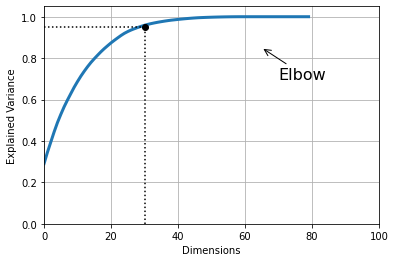

In [192]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1.05])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [193]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train_prepared)
x_test_reduced = pca.transform(x_test_prepared)
print(len(x_test_prepared))

20


In [199]:
lin_reg = LinearRegression()
lin_reg.fit(x_reduced, y_train)
y_pred = lin_reg.predict(x_test_reduced)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

51.928138023294075
99.7784942411794
0.4601759529399333


In [200]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prepared, y_train)
y_pred = tree_reg.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

52.50565782582501
147.480618
0.4481018556844112


In [201]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_prepared, y_train)
y_pred = forest_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

38.53479361439344
87.45032878999999
0.70272882447927


In [202]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor()
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [203]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,final_predictions)))
print(max_error(y_test,final_predictions))
print(r2_score(y_test,final_predictions))

57.175818309824855
108.34366869999998
0.34555748660523034
